In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('covid_19.csv')

In [3]:
df.head(20)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
5,2020-01-22,Antigua and Barbuda,0,0,0,0,0,0,0,Americas
6,2020-01-22,Argentina,0,0,0,0,0,0,0,Americas
7,2020-01-22,Armenia,0,0,0,0,0,0,0,Europe
8,2020-01-22,Australia,0,0,0,0,0,0,0,Western Pacific
9,2020-01-22,Austria,0,0,0,0,0,0,0,Europe


In [4]:
df.rename(columns={'WHO Region':'Continent', 'Country/Region':'Country'}, inplace=True)

In [5]:
df.head(20)

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Continent
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
5,2020-01-22,Antigua and Barbuda,0,0,0,0,0,0,0,Americas
6,2020-01-22,Argentina,0,0,0,0,0,0,0,Americas
7,2020-01-22,Armenia,0,0,0,0,0,0,0,Europe
8,2020-01-22,Australia,0,0,0,0,0,0,0,Western Pacific
9,2020-01-22,Austria,0,0,0,0,0,0,0,Europe


In [6]:
df.head()

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Continent
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [7]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           35156 non-null  object
 1   Country        35156 non-null  object
 2   Confirmed      35156 non-null  int64 
 3   Deaths         35156 non-null  int64 
 4   Recovered      35156 non-null  int64 
 5   Active         35156 non-null  int64 
 6   New cases      35156 non-null  int64 
 7   New deaths     35156 non-null  int64 
 8   New recovered  35156 non-null  int64 
 9   Continent      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [9]:
df = df.fillna('NA')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           35156 non-null  object
 1   Country        35156 non-null  object
 2   Confirmed      35156 non-null  int64 
 3   Deaths         35156 non-null  int64 
 4   Recovered      35156 non-null  int64 
 5   Active         35156 non-null  int64 
 6   New cases      35156 non-null  int64 
 7   New deaths     35156 non-null  int64 
 8   New recovered  35156 non-null  int64 
 9   Continent      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [19]:
df.head()

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Continent
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [20]:
df1 = df.groupby('Country')[['Country','Confirmed','Deaths','Recovered','Continent']].sum().reset_index()

In [21]:
df1

,Country,Confirmed,Deaths,Recovered
0,Afghanistan,1936390,49098,798240
1,Albania,196702,5708,118877
2,Algeria,1179755,77972,755897
3,Andorra,94404,5423,69074
4,Angola,22662,1078,6573
...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124
183,Western Sahara,901,63,648
184,Yemen,67180,17707,23779
185,Zambia,129421,2643,83611


In [36]:
df_continent = df.groupby('Continent')[['Continent','Country','Confirmed','Deaths','Recovered']].sum().reset_index()

In [37]:
df_continent

,Continent,Confirmed,Deaths,Recovered
0,Africa,21791827,439978,11193730
1,Americas,402261194,19359292,157069444
2,Eastern Mediterranean,74082892,1924029,48050703
3,Europe,248879793,19271040,123202075
4,South-East Asia,55118365,1458134,30030327
5,Western Pacific,26374411,932430,18861950


In [38]:
df2=df.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered','Continent']].sum().reset_index()

In [39]:
df2

,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
35151,Zimbabwe,2020-07-23,2124,28,510
35152,Zimbabwe,2020-07-24,2296,32,514
35153,Zimbabwe,2020-07-25,2434,34,518
35154,Zimbabwe,2020-07-26,2512,34,518


In [24]:
df3 = df2[df2['Confirmed']>100]

In [25]:
df3

,Country,Date,Confirmed,Deaths,Recovered
65,Afghanistan,2020-03-27,110,4,2
66,Afghanistan,2020-03-28,110,4,2
67,Afghanistan,2020-03-29,120,4,2
68,Afghanistan,2020-03-30,170,4,2
69,Afghanistan,2020-03-31,174,4,5
...,...,...,...,...,...
35151,Zimbabwe,2020-07-23,2124,28,510
35152,Zimbabwe,2020-07-24,2296,32,514
35153,Zimbabwe,2020-07-25,2434,34,518
35154,Zimbabwe,2020-07-26,2512,34,518


In [32]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [33]:
df3 = df2.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

In [34]:
df3.head(20)

,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
5,Afghanistan,2020-01-27,0,0,0
6,Afghanistan,2020-01-28,0,0,0
7,Afghanistan,2020-01-29,0,0,0
8,Afghanistan,2020-01-30,0,0,0
9,Afghanistan,2020-01-31,0,0,0


In [29]:
countries = df3['Country'].unique()
len(countries)

187

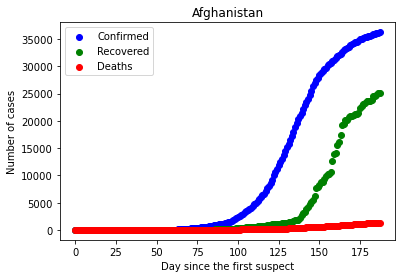

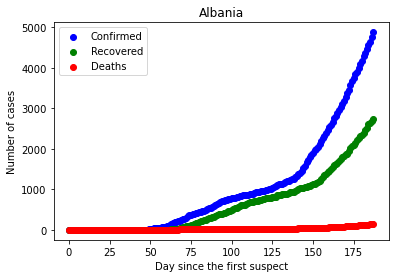

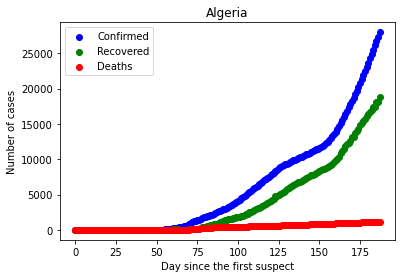

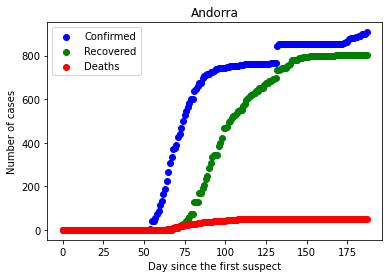

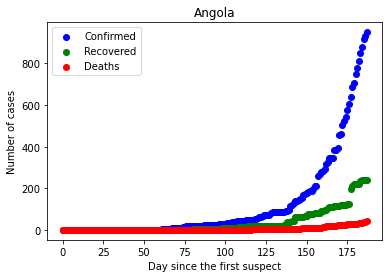

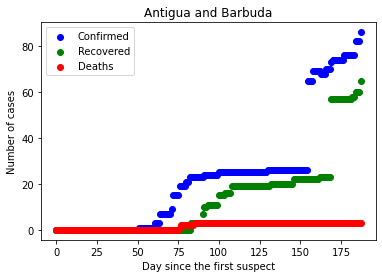

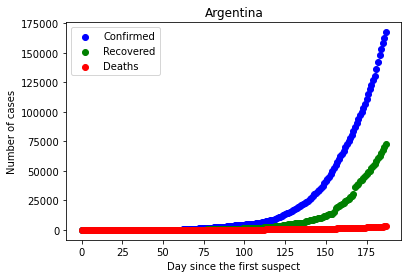

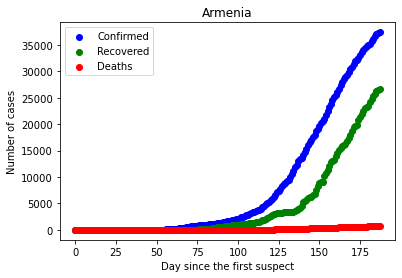

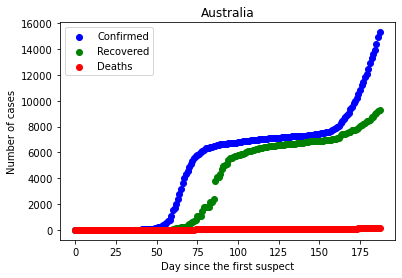

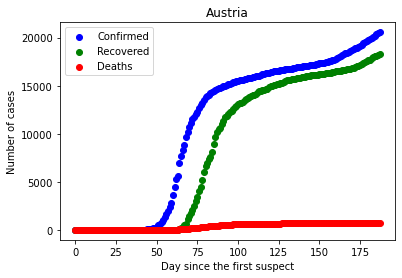

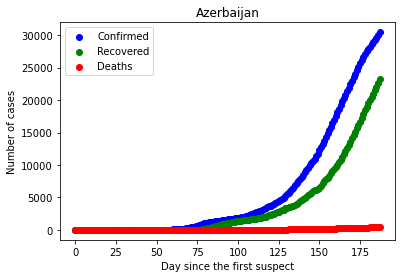

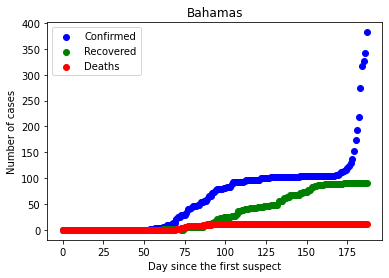

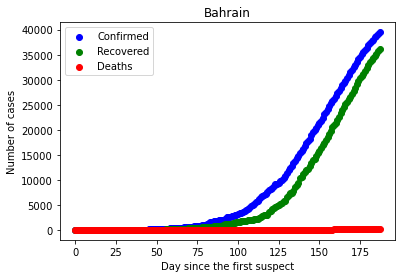

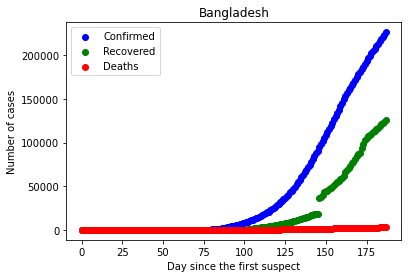

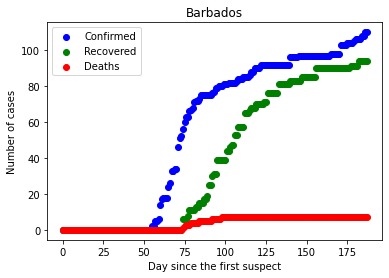

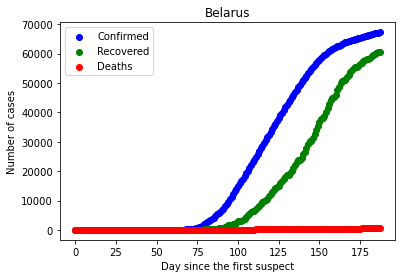

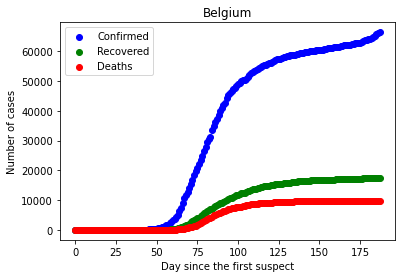

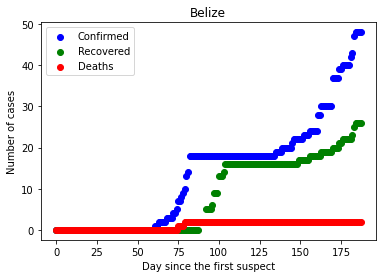

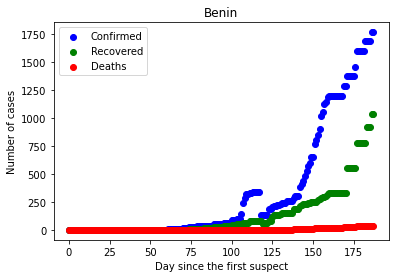

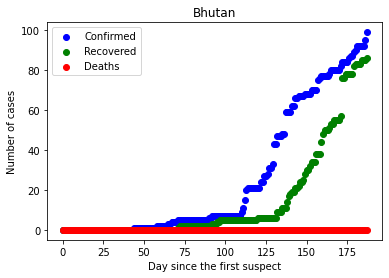

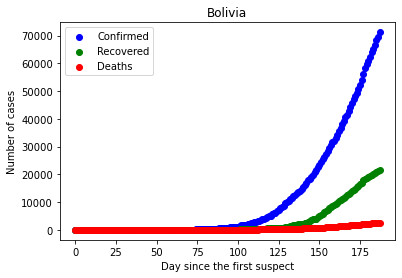

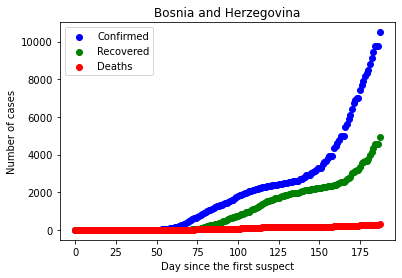

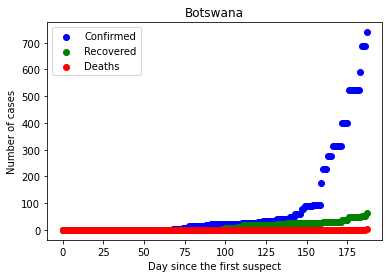

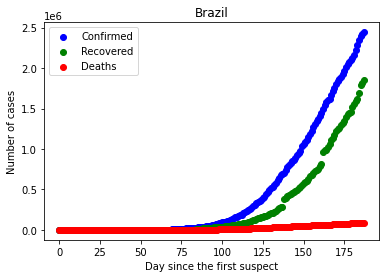

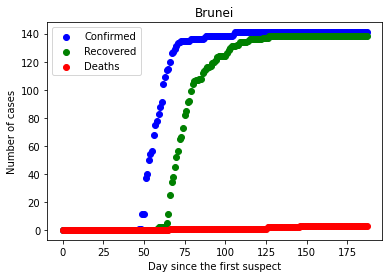

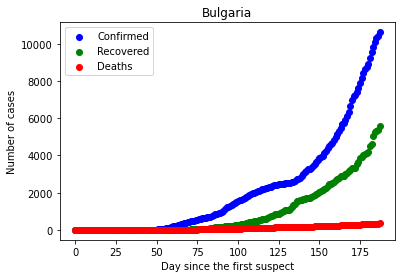

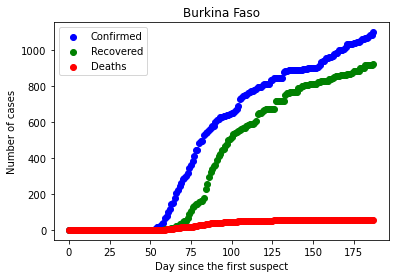

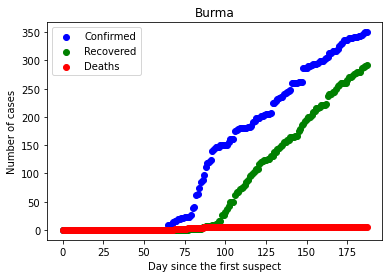

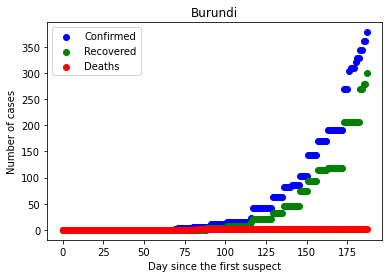

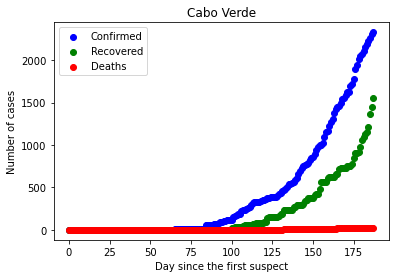

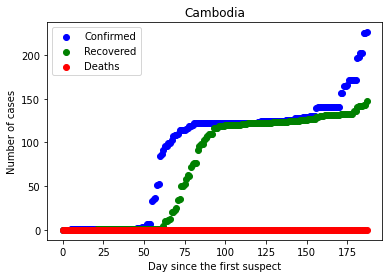

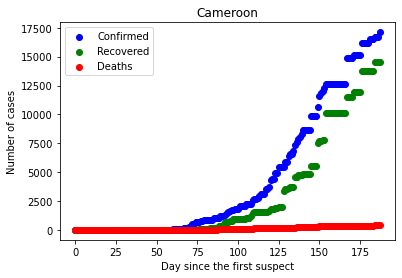

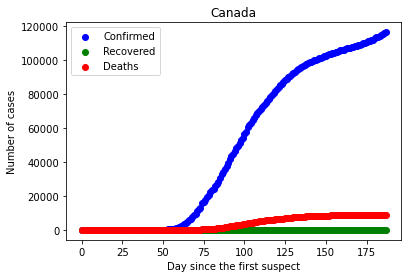

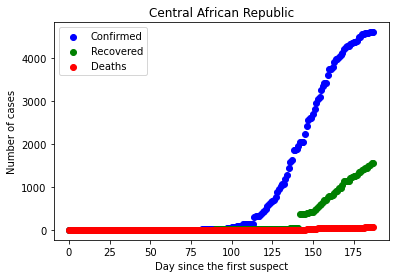

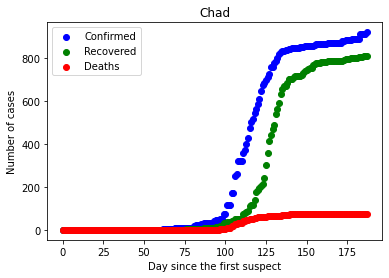

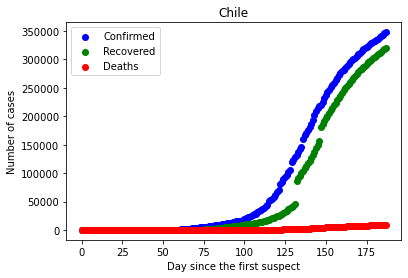

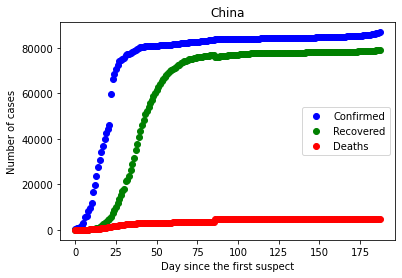

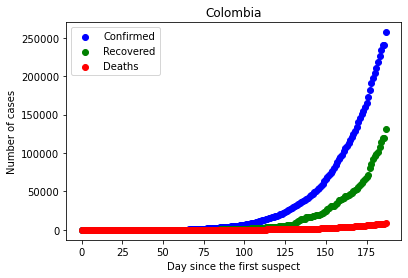

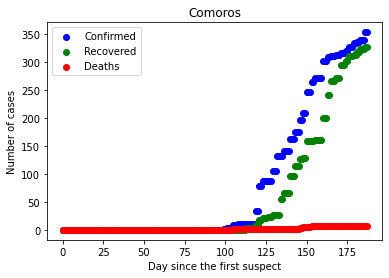

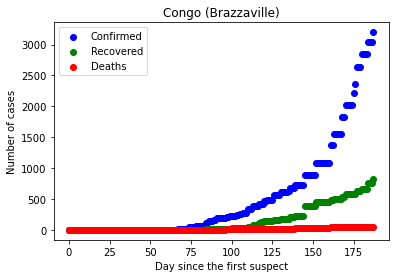

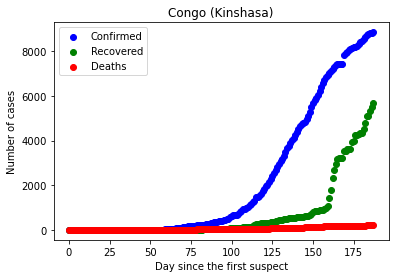

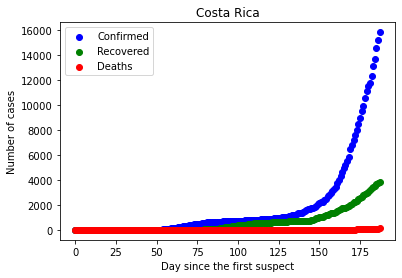

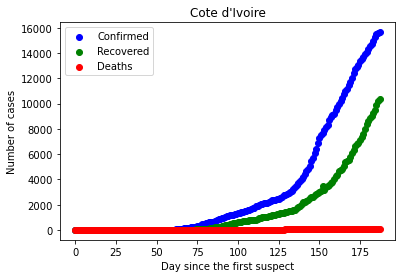

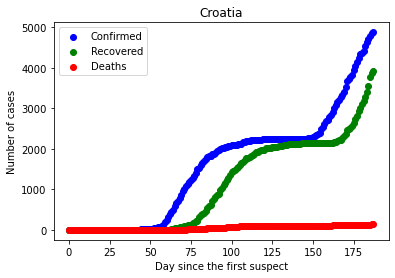

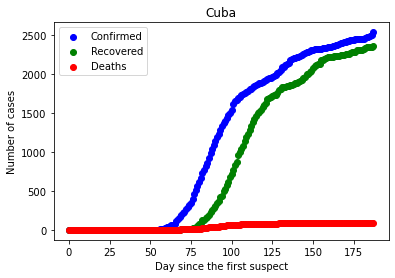

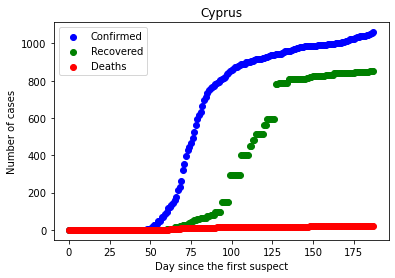

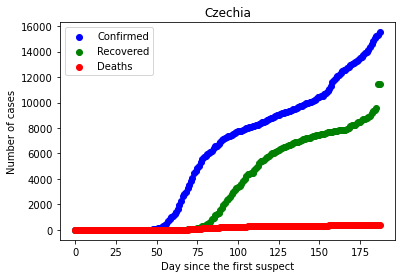

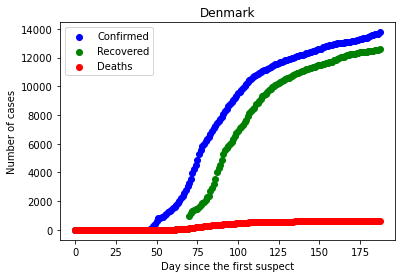

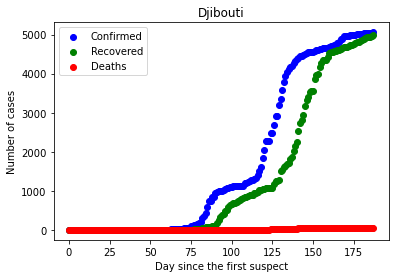

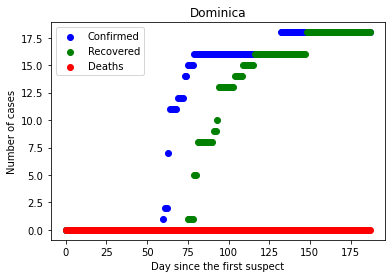

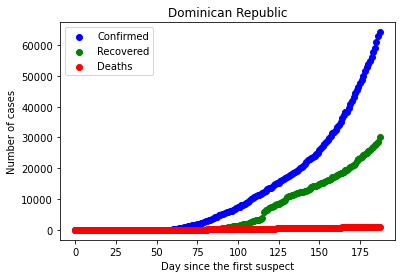

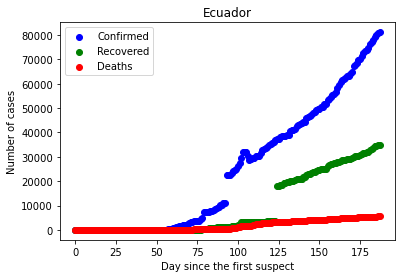

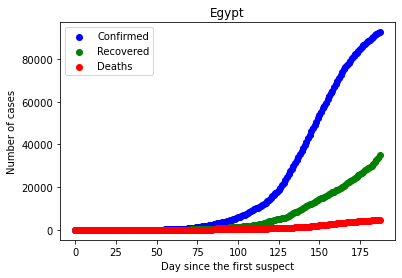

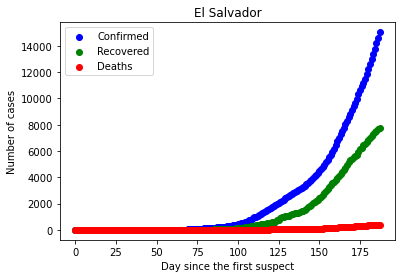

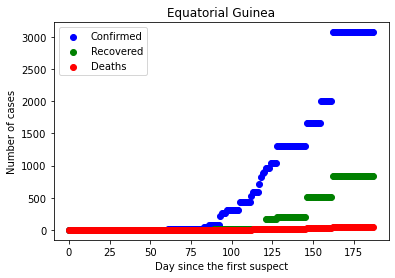

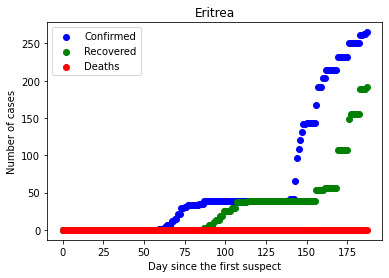

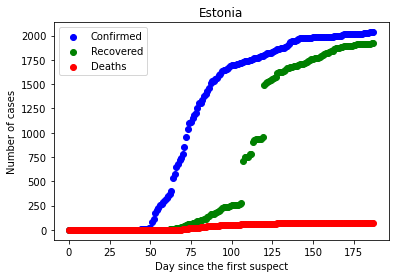

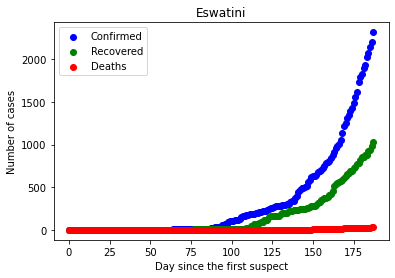

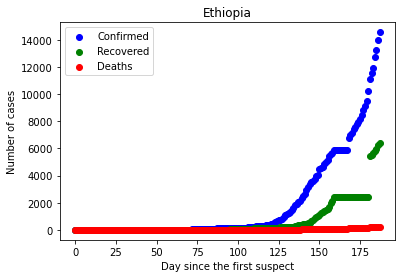

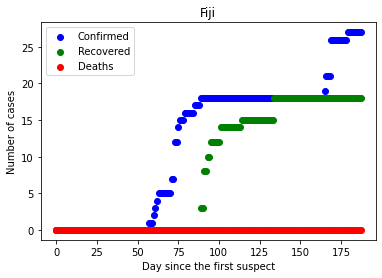

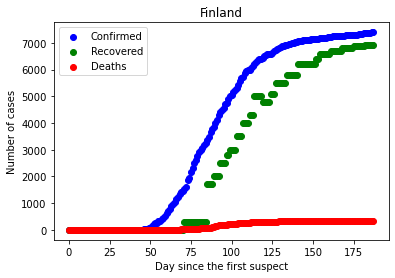

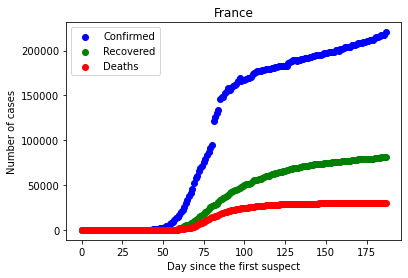

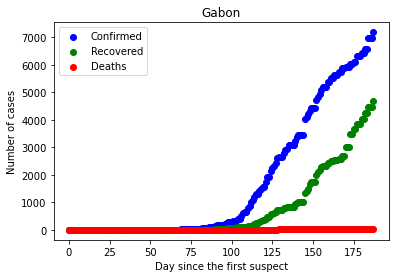

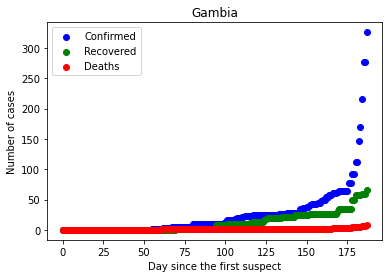

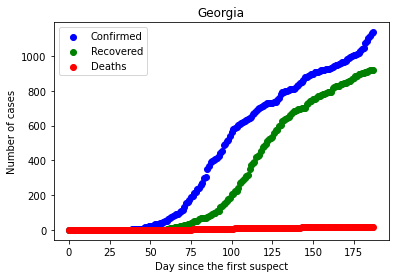

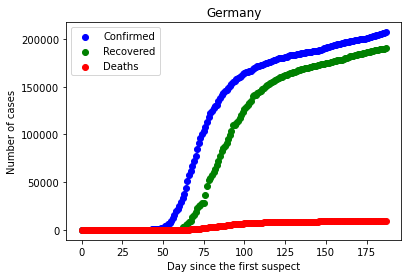

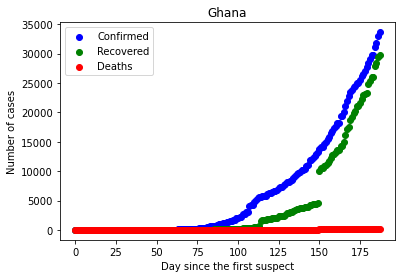

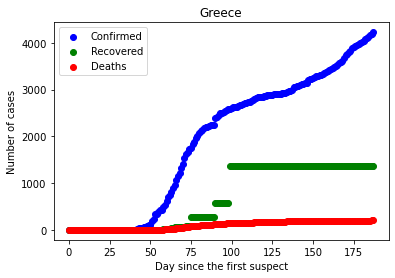

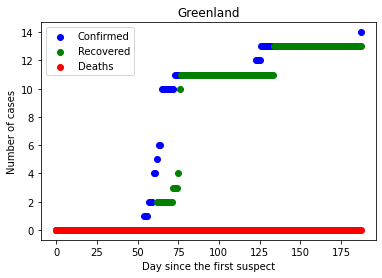

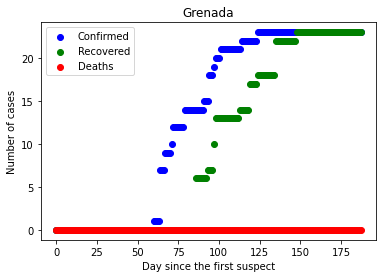

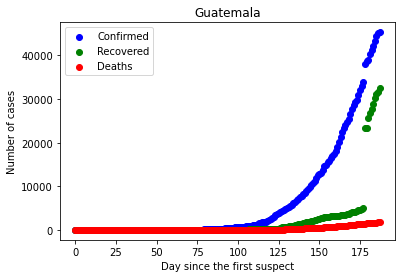

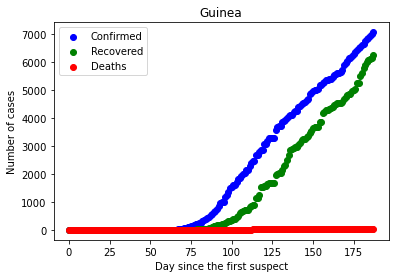

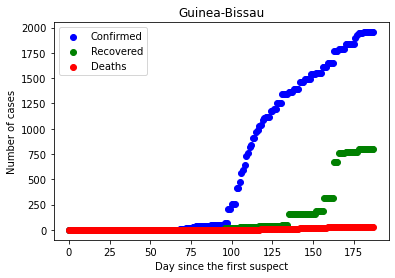

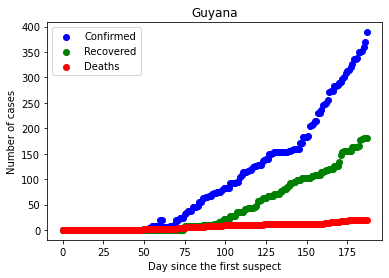

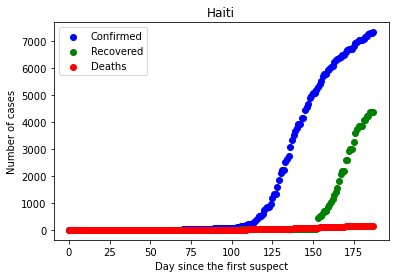

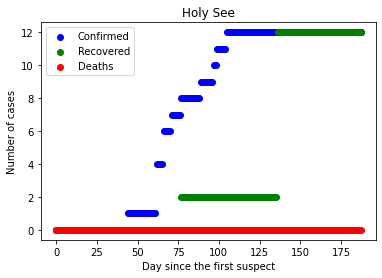

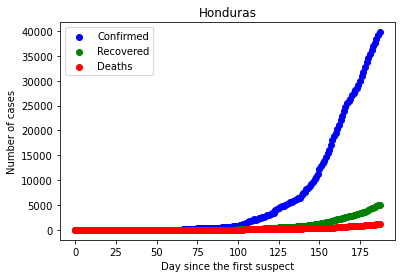

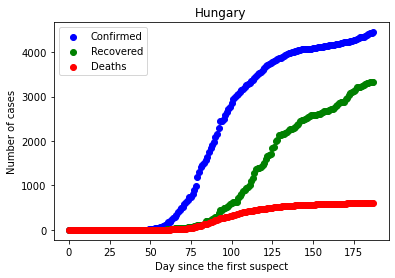

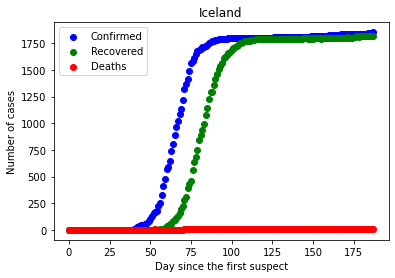

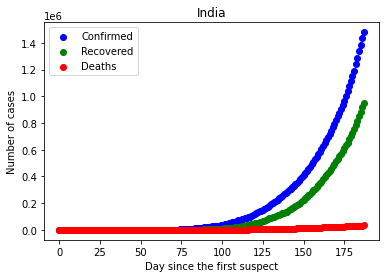

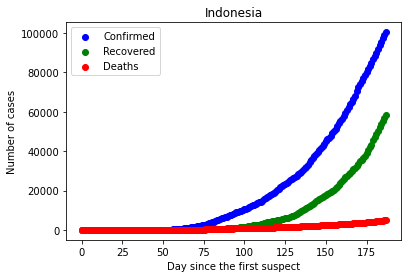

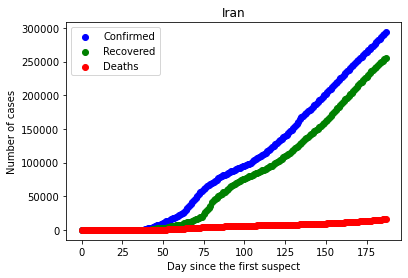

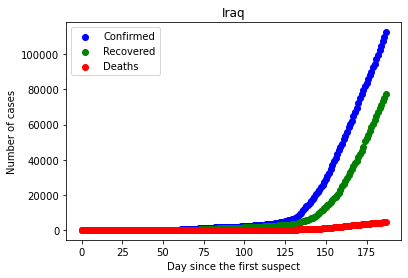

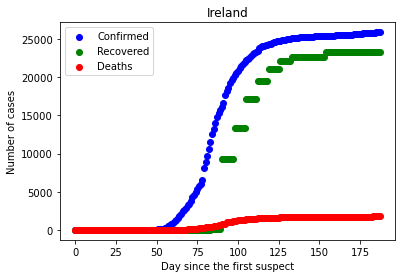

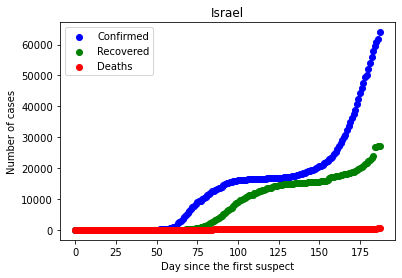

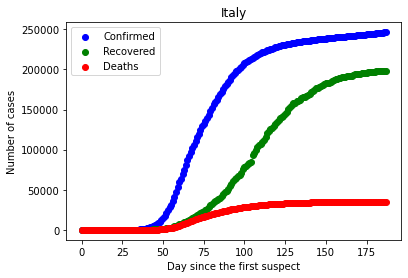

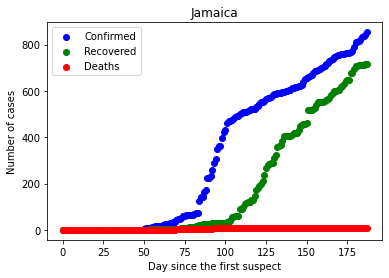

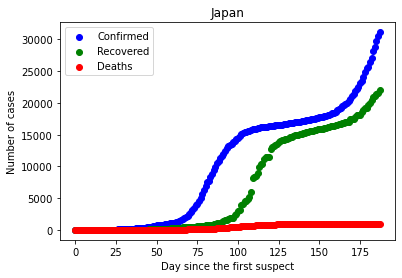

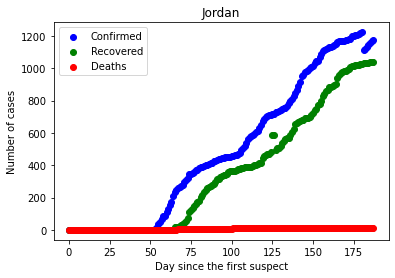

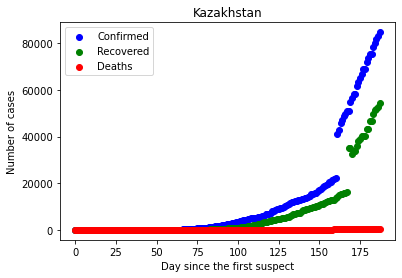

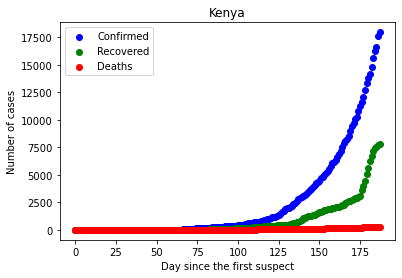

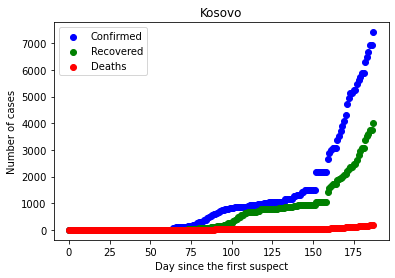

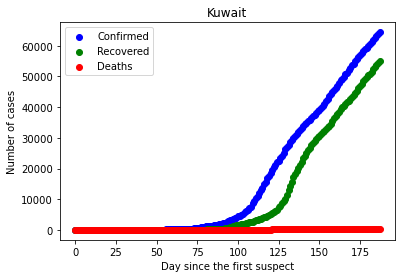

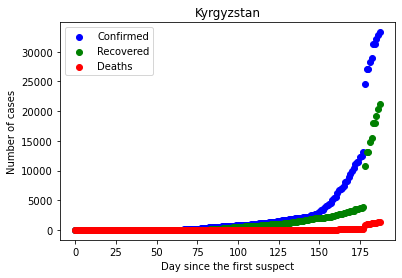

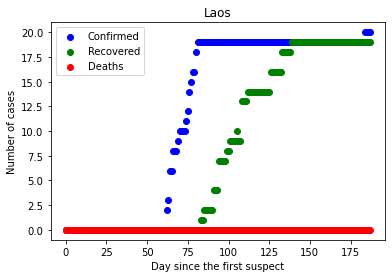

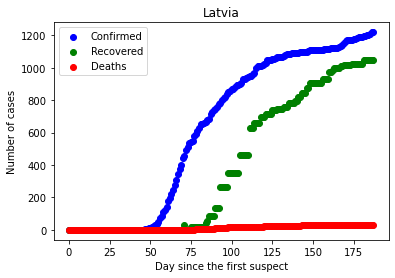

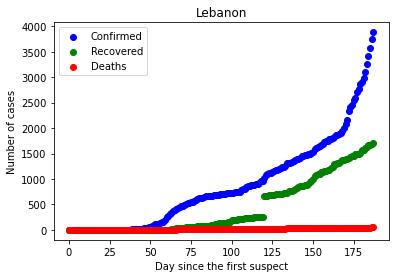

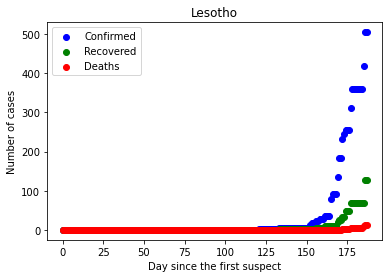

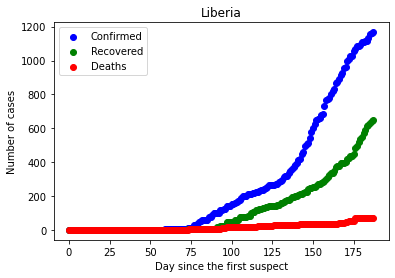

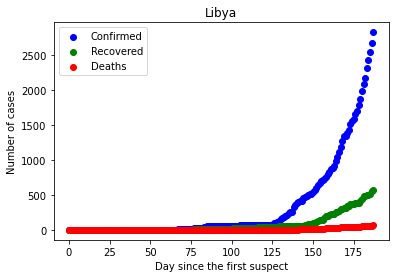

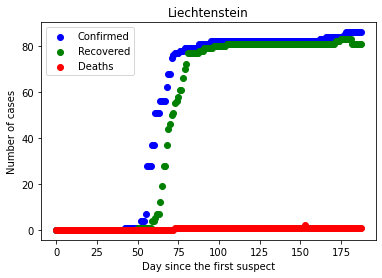

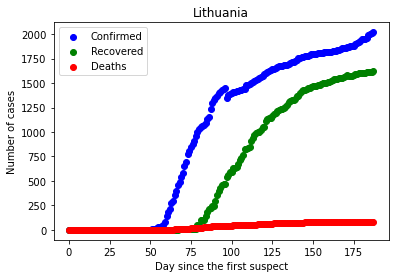

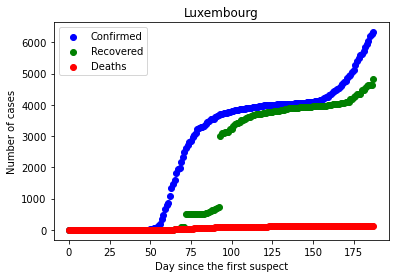

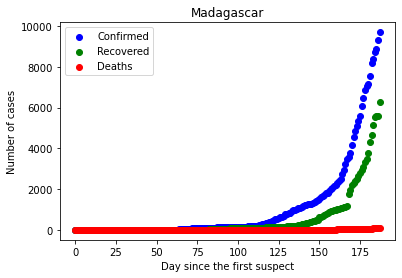

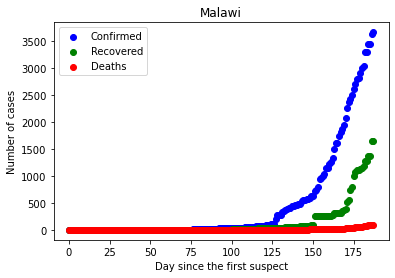

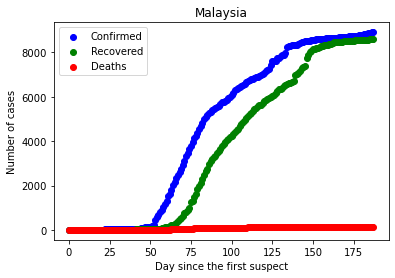

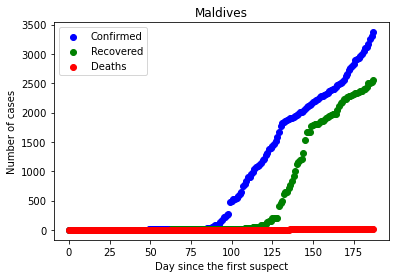

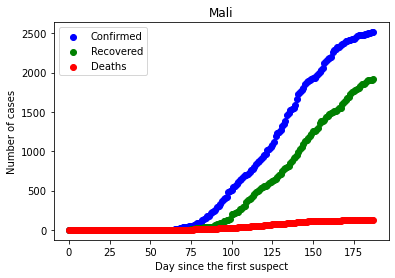

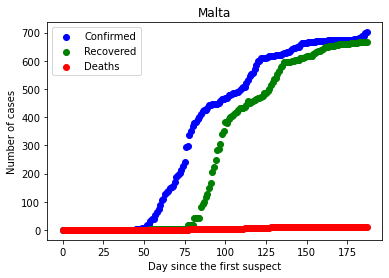

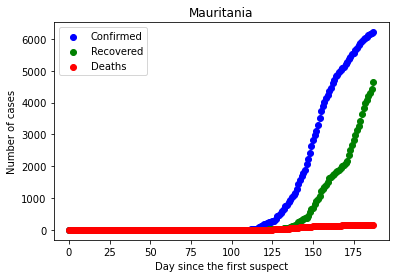

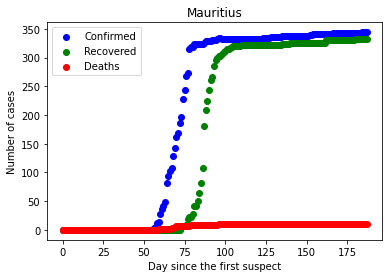

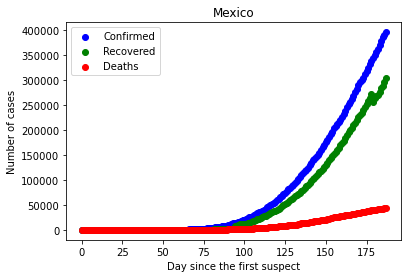

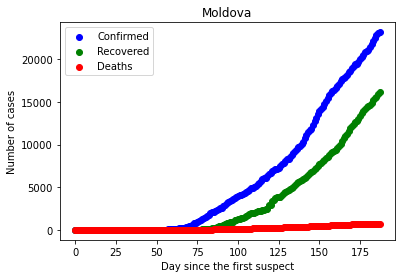

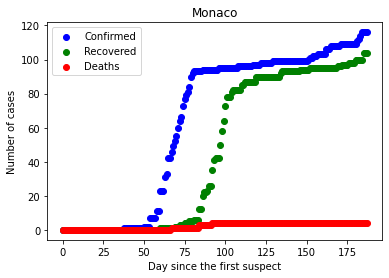

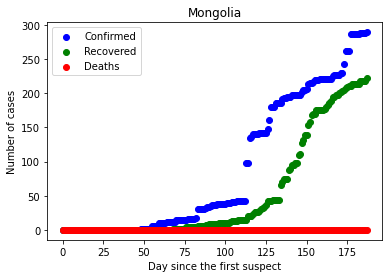

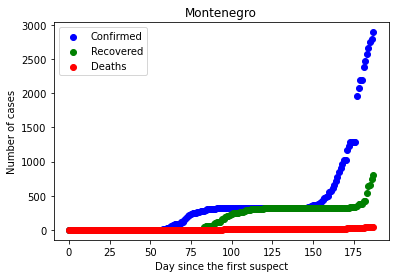

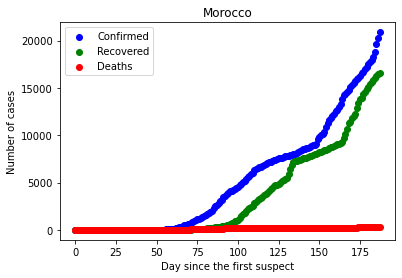

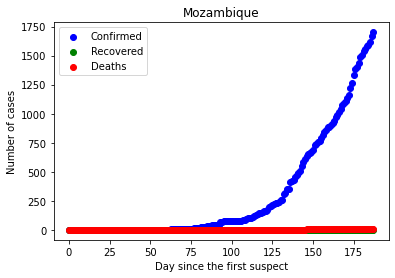

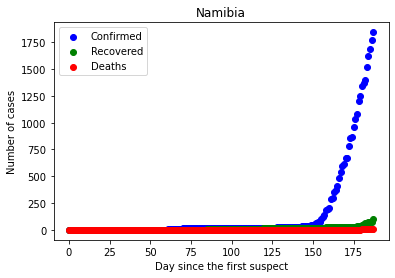

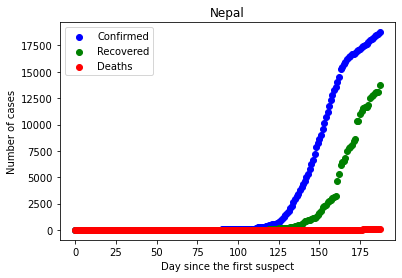

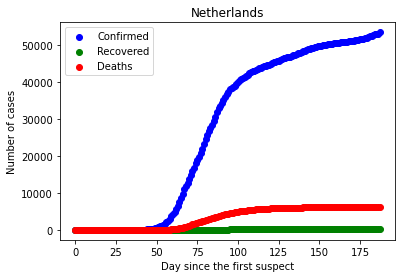

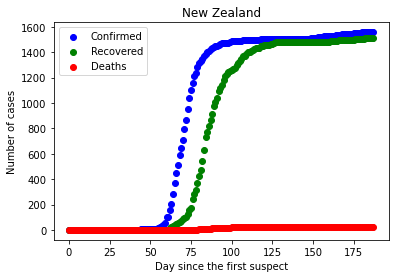

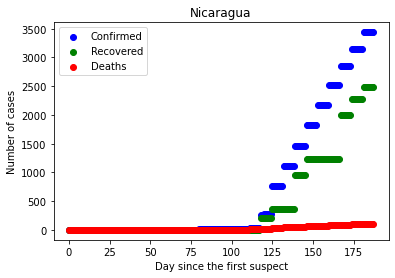

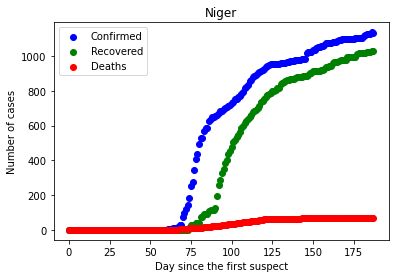

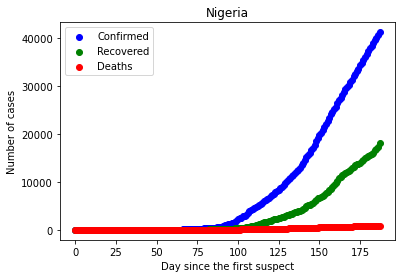

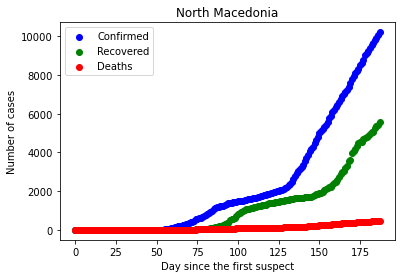

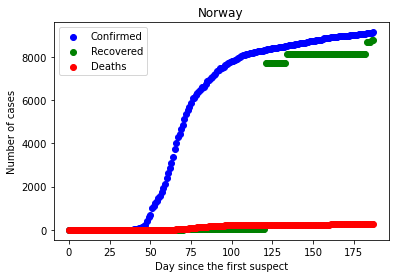

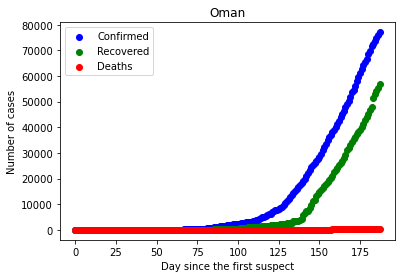

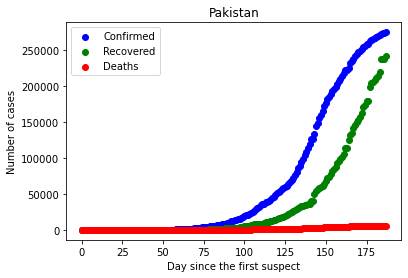

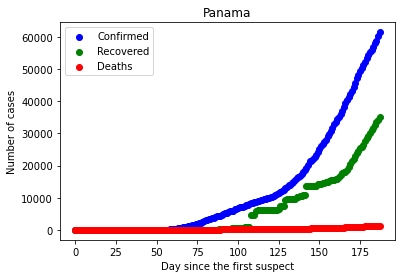

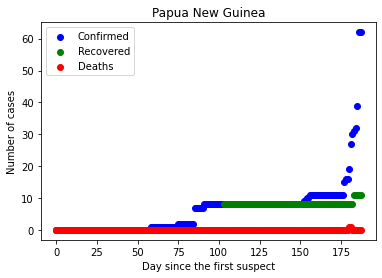

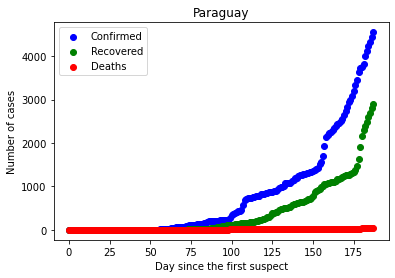

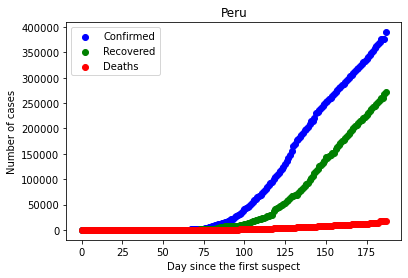

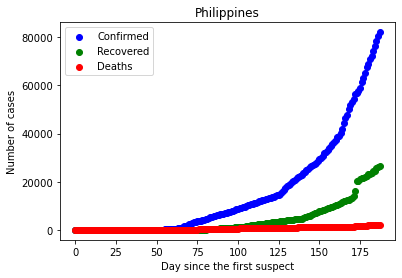

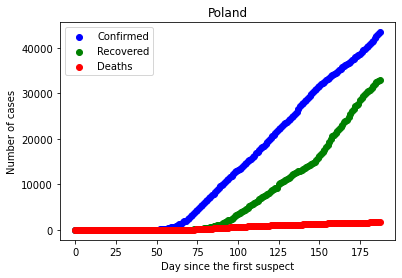

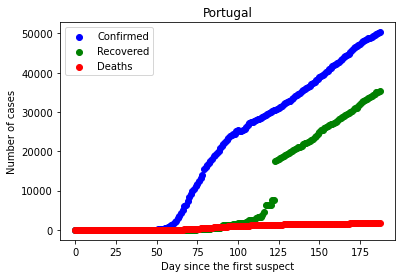

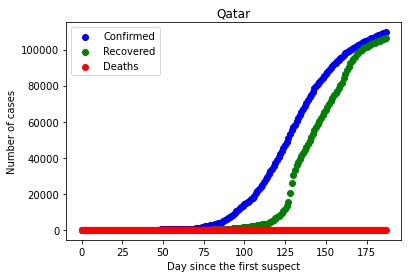

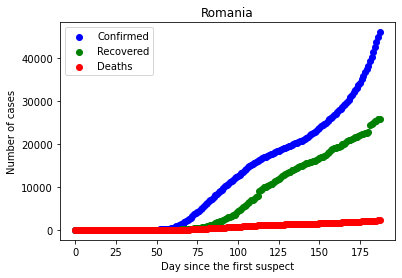

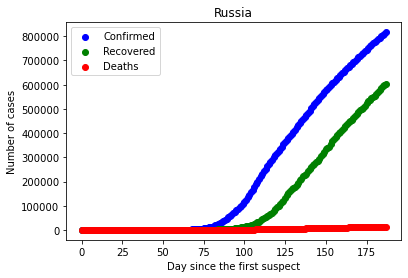

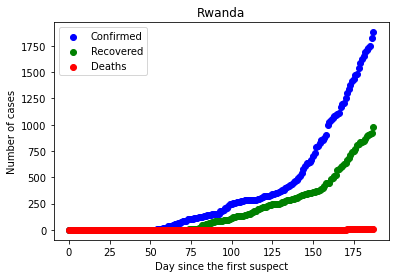

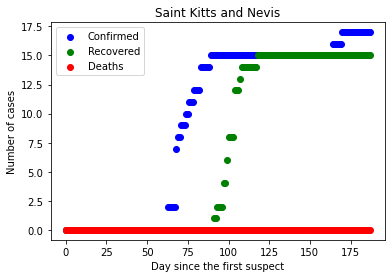

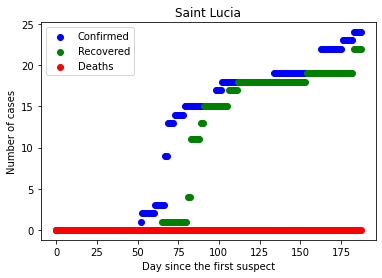

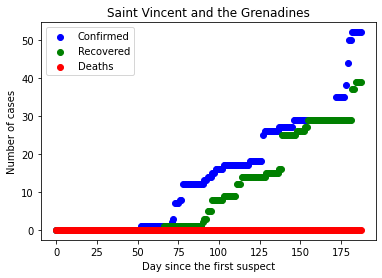

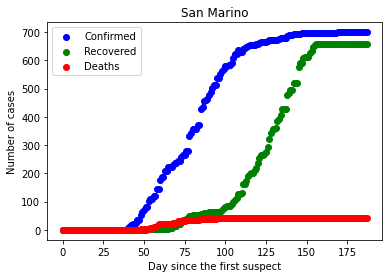

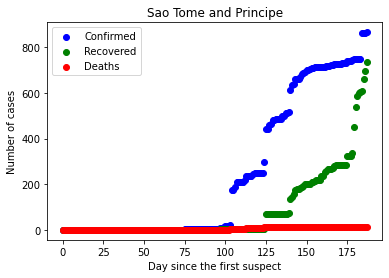

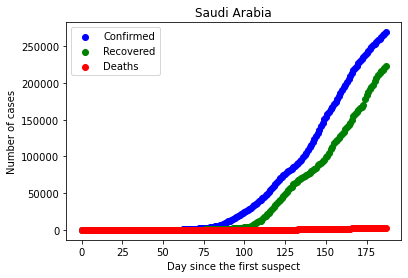

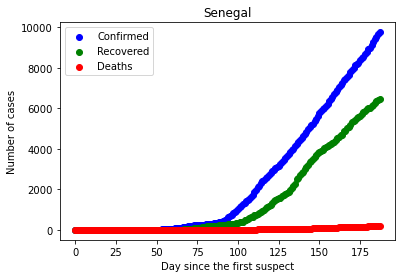

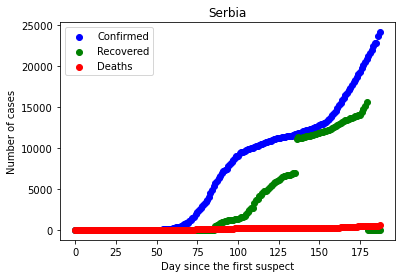

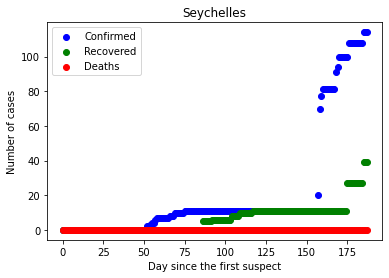

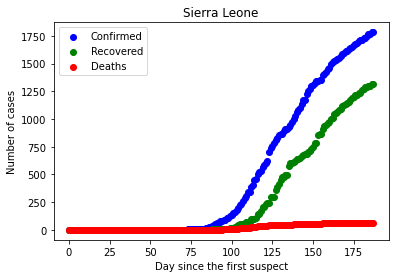

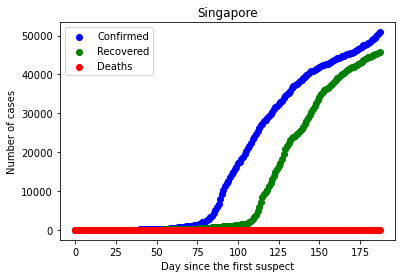

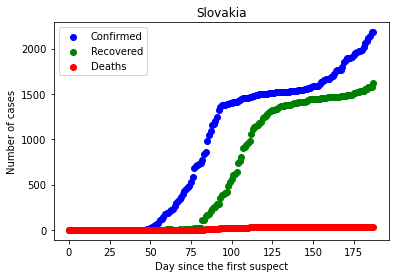

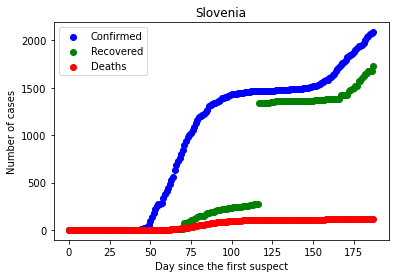

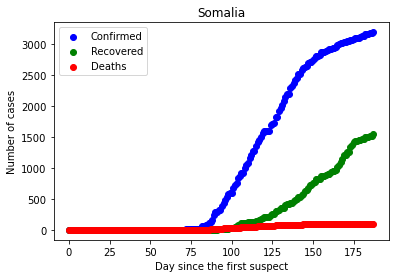

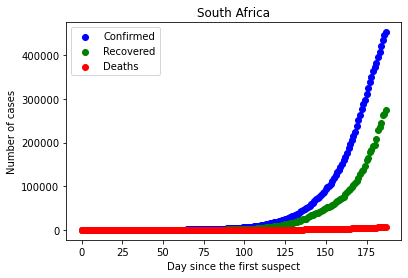

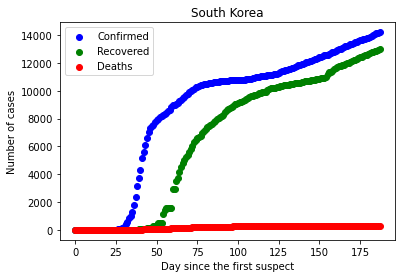

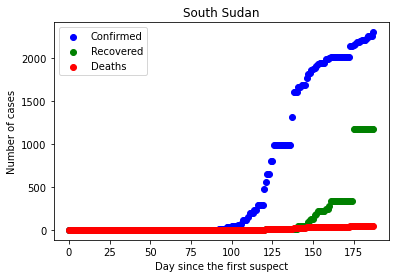

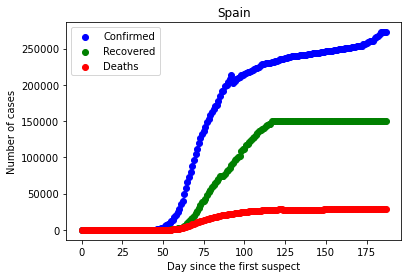

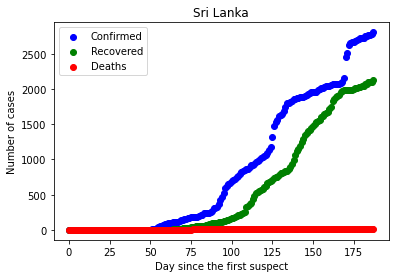

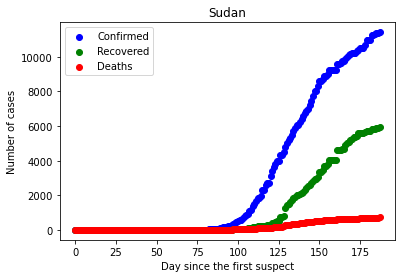

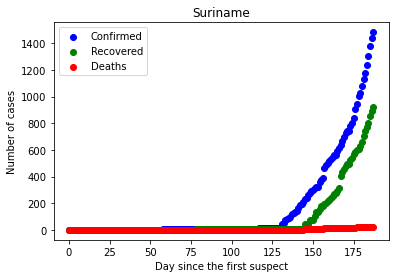

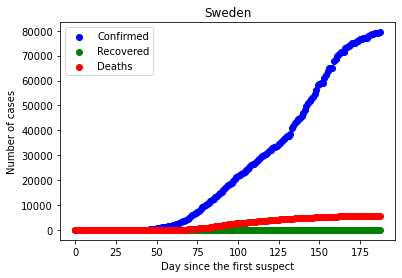

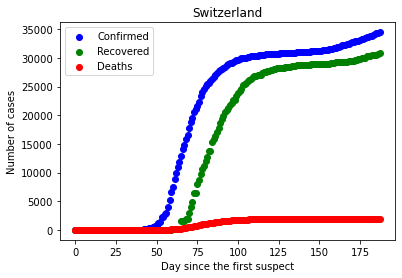

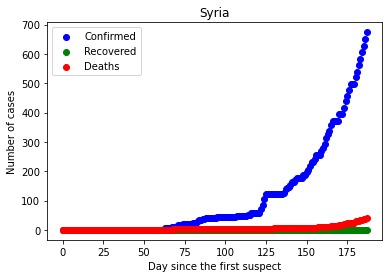

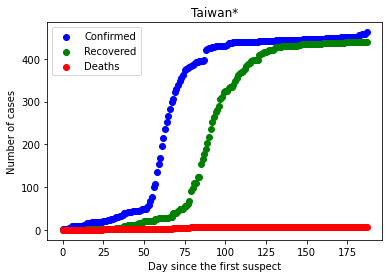

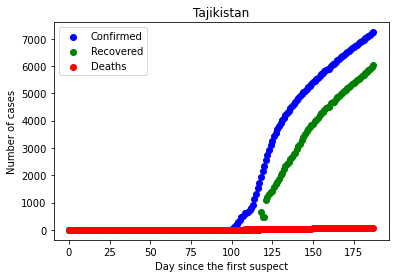

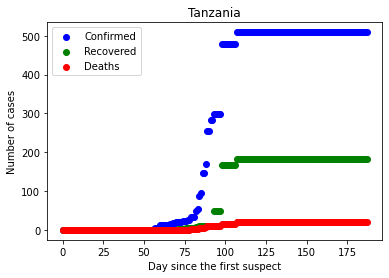

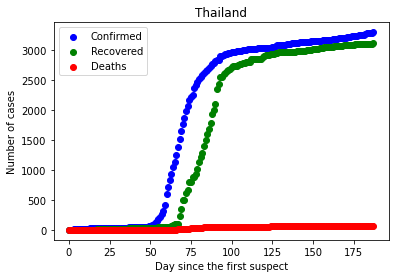

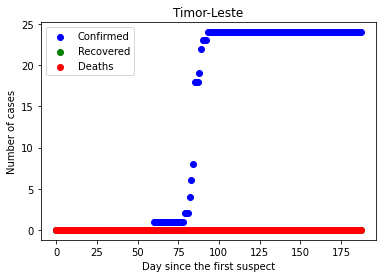

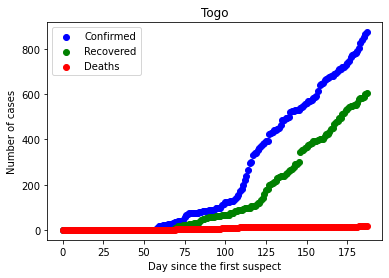

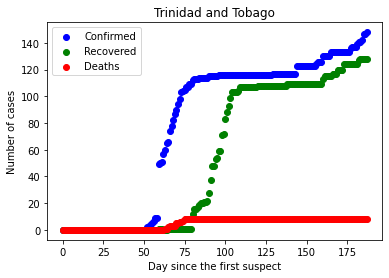

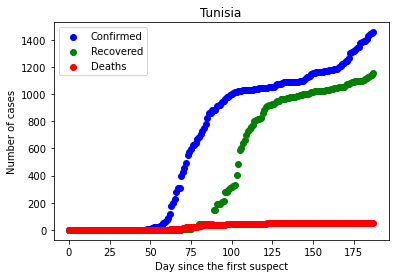

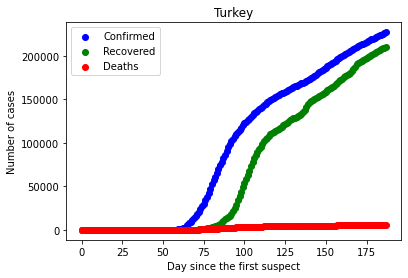

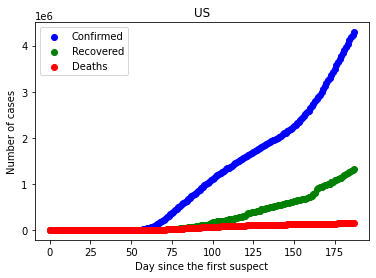

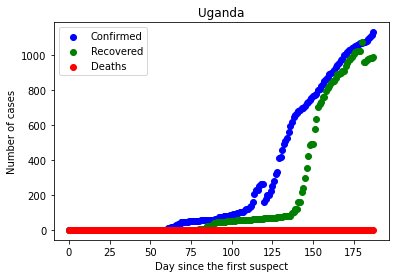

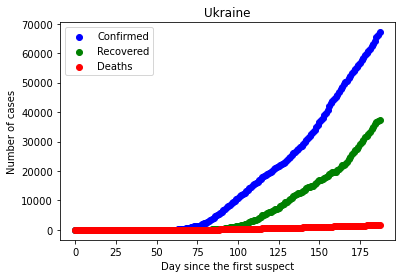

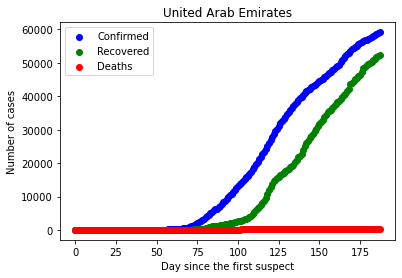

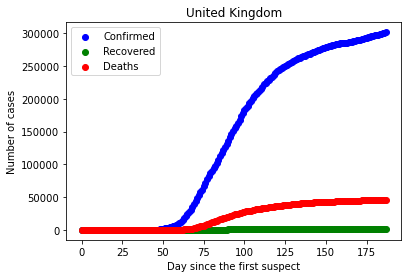

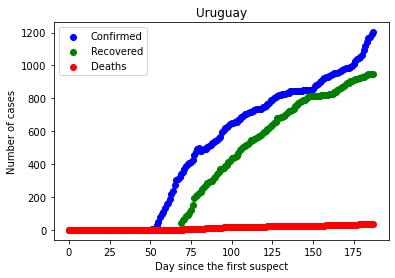

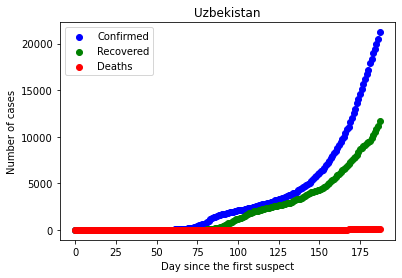

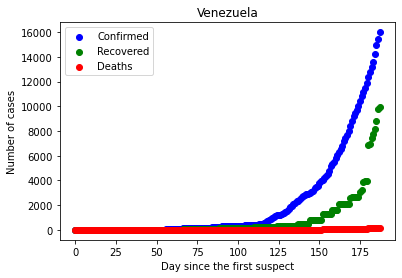

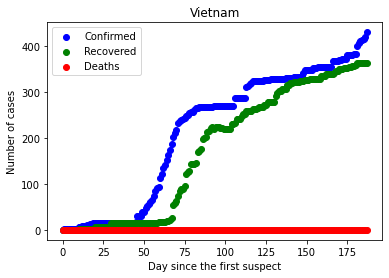

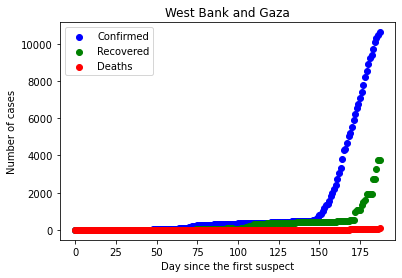

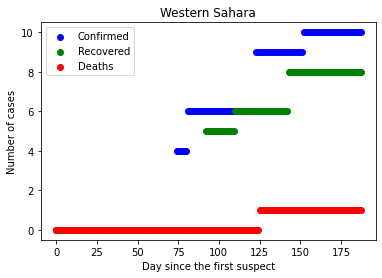

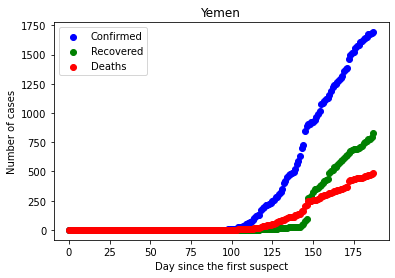

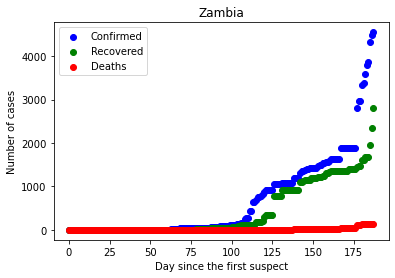

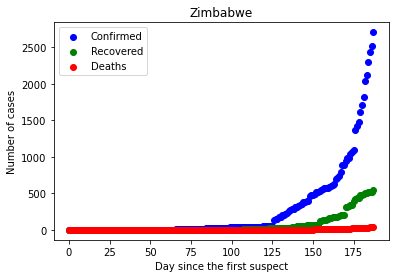

In [30]:
for idx in range(0,len(countries)):
    C = df3[df3['Country']==countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label= 'Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Day since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

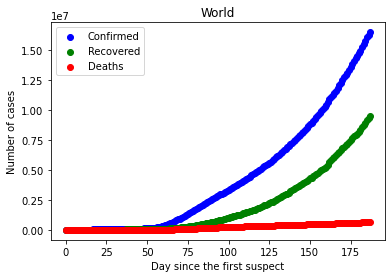

In [42]:
df4=df3.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()
C=df4
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label= 'Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Day since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()

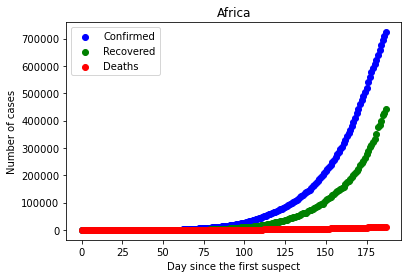

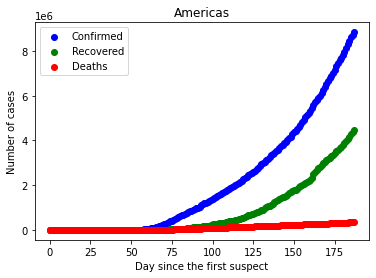

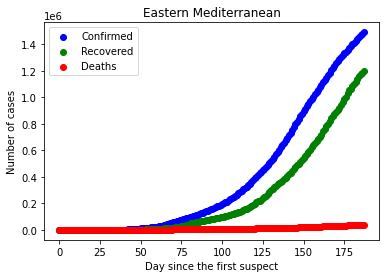

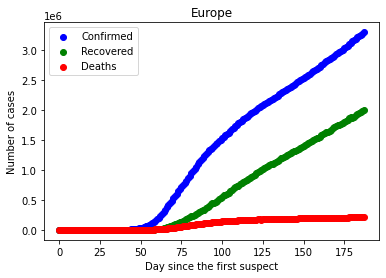

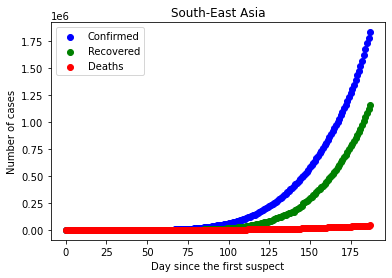

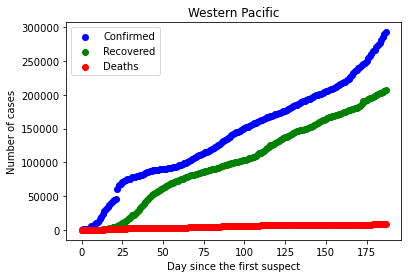

In [41]:
df_continent = df.groupby(['Continent','Date'])[['Continent','Date','Confirmed','Deaths','Recovered']].sum().reset_index()
continent = df_continent['Continent'].unique()
len(continent)
for idx in range(0,len(continent)):
    C = df_continent[df_continent['Continent']==continent[idx]].reset_index()
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label= 'Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(continent[idx])
    plt.xlabel('Day since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()